<a href="https://colab.research.google.com/github/Praise-Oluwasikemi/tag-along-stage-C/blob/main/tag_along_stage_c_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,  KFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
import plotly.figure_factory as ff
from imblearn.combine import SMOTETomek
import warnings

In [ ]:
 pip install U imbalanced-learn

In [ ]:
 churn = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df = churn.drop('customerID', axis=1)

In [ ]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
step1 = [len(i.split()) for i in df['TotalCharges']] # splitting individual elements of 'Total_Charges'
step2 = [i for i in range(len(step1)) if step1[i] != 1] # storing the index values of 'Total_Charges' where length is not equal to 1.
print('Number of entries with empty string: ', len(step2))

Number of entries with empty string:  11


In [ ]:
df = df.drop(step2, axis = 0).reset_index(drop=True)

In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
print("Data type converted to float")

Data type converted to float


In [ ]:
df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")

Duplicated values dropped succesfully


In [ ]:
# Convert 'Churn' column to binary values
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [ ]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod']
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
le = LabelEncoder()

In [ ]:
df1 = df


X = df1.drop('Churn', axis=1)
y = df1['Churn']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
Standard_Scaler = StandardScaler()
Standard_Scaler.fit_transform(X_train[numerical])
Standard_Scaler.transform(X_test[numerical])

array([[ 0.34928126, -0.81508377, -0.26622345],
       [ 1.00122643, -0.30337533,  0.39418685],
       [-0.91386252, -1.49513928, -0.92502002],
       ...,
       [-0.22117077,  0.35667854, -0.17068225],
       [-1.15834196,  1.20174752, -0.83151256],
       [-1.19908854,  0.33834371, -0.91412187]])

In [ ]:
from sklearn.compose import make_column_transformer
# Encoding multiple columns. paste all printed categorical columns.
transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
     ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
      'PhoneService', 'MultipleLines', 'InternetService',
      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
      'TechSupport', 'StreamingTV', 'StreamingMovies',
      'Contract', 'PaperlessBilling', 'PaymentMethod']))

In [ ]:
# Transforming
transformed = transformer.fit_transform(X_train)
# Transformating back
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
# One-hot encoding removed index. Let's put it back:
transformed_df.index = X_train.index



In [ ]:

# Joining tables
X_train = pd.concat([X_train, transformed_df], axis=1)

In [ ]:

X_train.drop(categorical, axis=1, inplace=True) # Dropping categorical columns

In [ ]:
print(X_train.columns)

Index(['tenure', 'MonthlyCharges', 'TotalCharges',
       'onehotencoder__gender_Female', 'onehotencoder__gender_Male',
       'onehotencoder__SeniorCitizen_0', 'onehotencoder__SeniorCitizen_1',
       'onehotencoder__Partner_No', 'onehotencoder__Partner_Yes',
       'onehotencoder__Dependents_No', 'onehotencoder__Dependents_Yes',
       'onehotencoder__PhoneService_No', 'onehotencoder__PhoneService_Yes',
       'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_N

In [ ]:
X_train.head()

,tenure,MonthlyCharges,TotalCharges,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__SeniorCitizen_0,onehotencoder__SeniorCitizen_1,onehotencoder__Partner_No,onehotencoder__Partner_Yes,onehotencoder__Dependents_No,...,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_No,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check
3012,18,61.50,1087.45,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4831,7,73.75,545.15,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5492,17,25.10,382.80,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
986,34,19.60,678.80,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6045,36,97.35,3457.90,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
# Transforming
transformed = transformer.transform(X_test)
# Transformating back
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
# One-hot encoding removed index. Let's put it back:
transformed_df.index = X_test.index

# Joining tables
X_test = pd.concat([X_test, transformed_df], axis=1)

X_test.drop(categorical, axis=1, inplace=True) # Dropping categorical columns

<ipython-input-30-4636d7071af2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(y=fimp.index, x=fimp.values, palette=palette, orient='h')


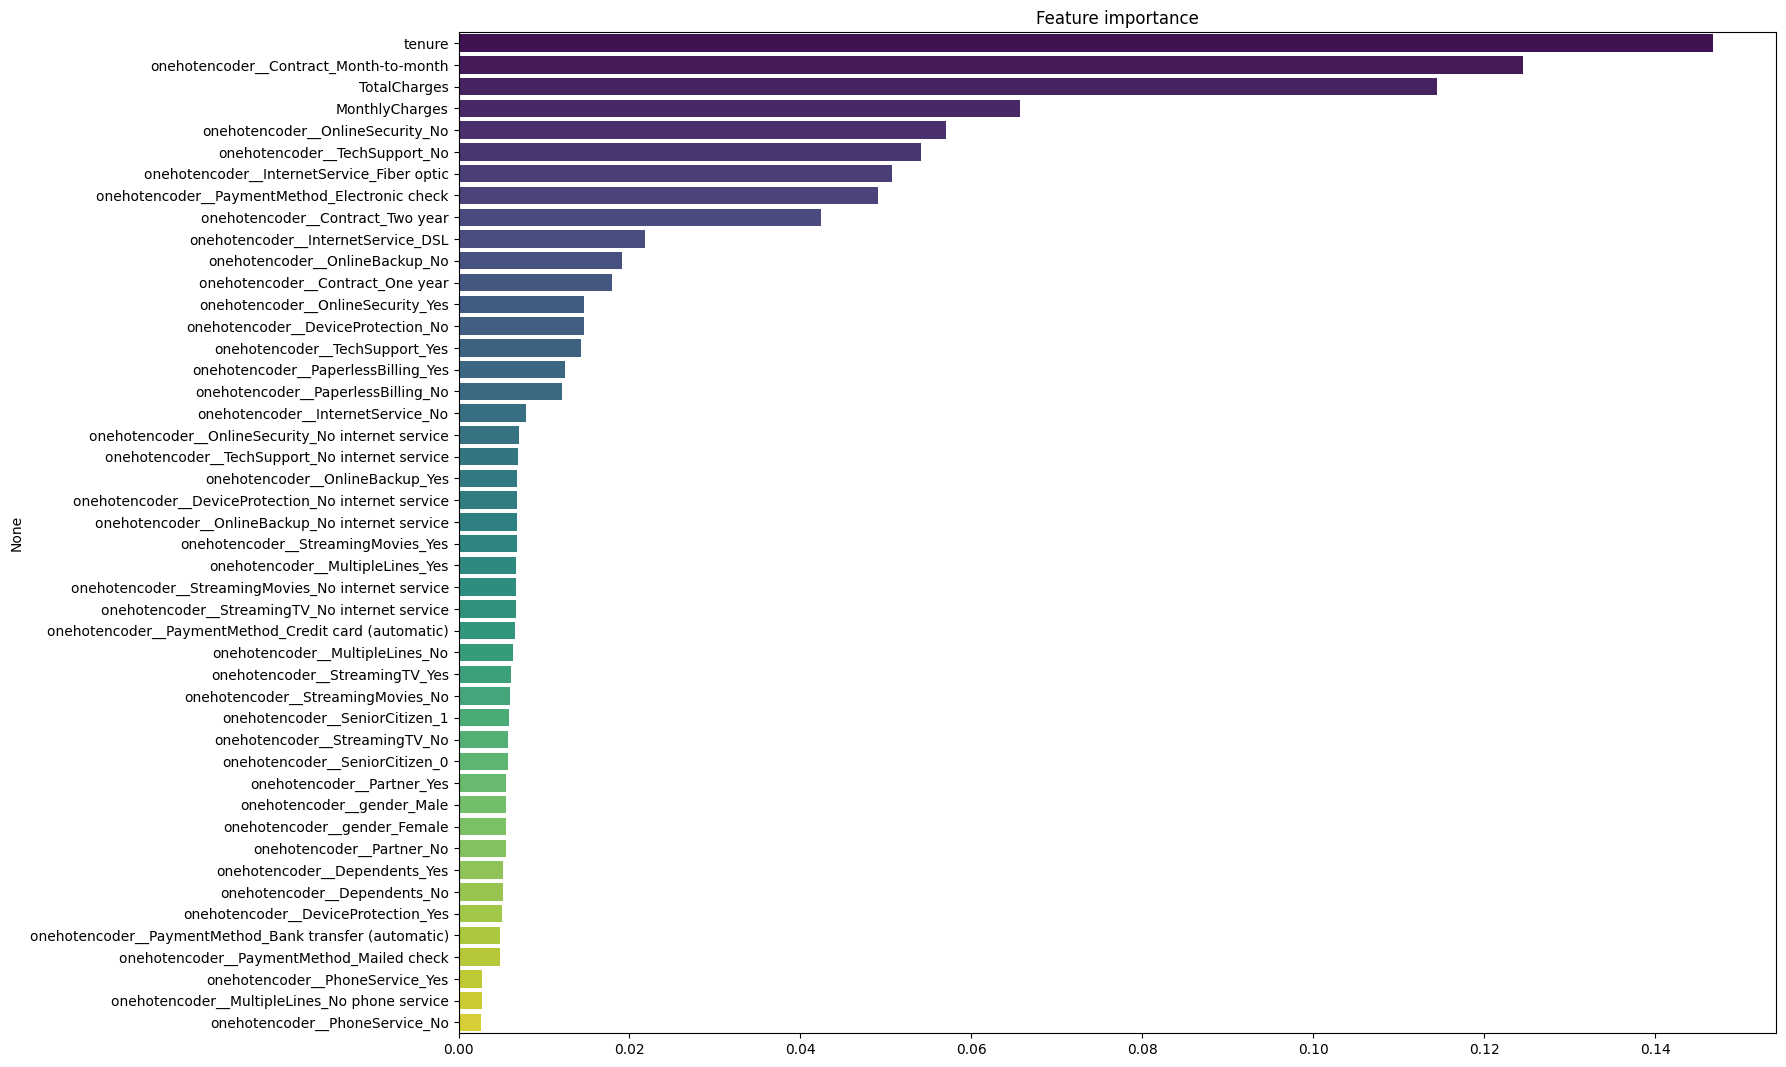

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

clf = RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=3, n_estimators=5000, random_state=1)
clf = clf.fit(X_train, y_train)
fimp = pd.Series(data=clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
palette = sb.color_palette("viridis", len(fimp))
plt.figure(figsize=(17,13))
plt.title("Feature importance")
ax = sb.barplot(y=fimp.index, x=fimp.values, palette=palette, orient='h')

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Classifier:
Accuracy: 0.7788873038516405
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1047
           1       0.58      0.46      0.51       355

    accuracy                           0.78      1402
   macro avg       0.70      0.67      0.68      1402
weighted avg       0.77      0.78      0.77      1402



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[929 118]
 [192 163]]


In [ ]:
rf_Recall = recall_score(y_test, y_pred)
rf_Precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_roc_auc = roc_auc_score(y_test, y_pred)

In [ ]:
from statistics import stdev
score = cross_val_score(rf, X_train, y_train, cv=5, scoring='recall', error_score="raise")
rf_cv_score = score.mean()
rf_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', rf_cv_score)
print('Cross Validation Recall standard deviation: ', rf_cv_stdev)

Cross Validation Recall scores are: [0.5        0.49501661 0.5282392  0.45333333 0.45666667]
Average Cross Validation Recall score:  0.4866511627906977
Cross Validation Recall standard deviation:  0.03157089249245392


In [ ]:
ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy, rf_roc_auc, rf_cv_score, rf_cv_stdev)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
rf_score.insert(0, 'Model', 'Random Forest')
rf_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Random Forest,0.459155,0.580071,0.512579,0.778887,0.673226,0.486651,0.031571


In [ ]:
params = {
    'n_estimators': [130],
    'max_depth': [14],
    'min_samples_split': [3],
    'min_samples_leaf': [2],
    'random_state': [1]
}

grid_rf = GridSearchCV(rf, param_grid=params, cv=5, scoring='recall').fit(X_train, y_train)

In [ ]:
print('Best parameters:', grid_rf.best_params_)
print('Best score:', grid_rf.best_score_)

Best parameters: {'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 130, 'random_state': 1}
Best score: 0.5079557032115172


In [ ]:
y_pred = grid_rf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

grid_rf_Recall = recall_score(y_test, y_pred)
grid_rf_Precision = precision_score(y_test, y_pred)
grid_rf_f1 = f1_score(y_test, y_pred)
grid_rf_accuracy = accuracy_score(y_test, y_pred)
grid_roc_auc = roc_auc_score(y_test, y_pred)

print(cm)

[[941 106]
 [181 174]]


In [ ]:
score2 = cross_val_score(grid_rf, X_train, y_train, cv=5, scoring='recall')

In [ ]:
grid_cv_score = score2.mean()
grid_cv_stdev = stdev(score2)

print('Cross Validation Recall scores are: {}'.format(score2))
print('Average Cross Validation Recall score: ', grid_cv_score)
print('Cross Validation Recall standard deviation: ', grid_cv_stdev)

Cross Validation Recall scores are: [0.51333333 0.54152824 0.52491694 0.47333333 0.48666667]
Average Cross Validation Recall score:  0.5079557032115172
Cross Validation Recall standard deviation:  0.02781927984532241


In [ ]:
ndf2 = [(grid_rf_Recall, grid_rf_Precision, grid_rf_f1, grid_rf_accuracy, grid_roc_auc, grid_cv_score, grid_cv_stdev)]

grid_score = pd.DataFrame(data = ndf2, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
grid_score.insert(0, 'Model', 'Random Forest after tuning')
grid_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Random Forest after tuning,0.490141,0.621429,0.548031,0.795292,0.69445,0.507956,0.027819


In [ ]:
# Train Extra Trees Classifier
et = ExtraTreesClassifier(random_state=1)
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)
print("\nExtra Trees Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_et))
print(classification_report(y_test, y_pred_et))


Extra Trees Classifier:
Accuracy: 0.761055634807418
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1047
           1       0.53      0.45      0.49       355

    accuracy                           0.76      1402
   macro avg       0.68      0.66      0.67      1402
weighted avg       0.75      0.76      0.75      1402



In [ ]:
et_Recall = recall_score(y_test, y_pred)
et_Precision = precision_score(y_test, y_pred)
et_f1 = f1_score(y_test, y_pred)
et_accuracy = accuracy_score(y_test, y_pred)
et_roc_auc = roc_auc_score(y_test, y_pred)

In [ ]:
score = cross_val_score(et, X_train, y_train, cv=5, scoring='recall', error_score="raise")
et_cv_score = score.mean()
et_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', et_cv_score)
print('Cross Validation Recall standard deviation: ', et_cv_stdev)

Cross Validation Recall scores are: [0.48333333 0.45182724 0.47508306 0.44333333 0.44666667]
Average Cross Validation Recall score:  0.4600487264673311
Cross Validation Recall standard deviation:  0.017988056357860046


In [ ]:
ndf = [(et_Recall, et_Precision, et_f1, et_accuracy, et_roc_auc, et_cv_score, et_cv_stdev)]

et_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
et_score.insert(0, 'Model', 'et')
et_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,et,0.512676,0.640845,0.56964,0.803852,0.707627,0.460049,0.017988


In [ ]:
params = {
    'n_estimators': [130],
    'max_depth': [14],
    'min_samples_split': [3],
    'min_samples_leaf': [2],
    'random_state': [1]
}

grid_et = GridSearchCV(et, param_grid=params, cv=5, scoring='recall').fit(X_train, y_train)

In [ ]:
print('Best parameters:', grid_et.best_params_)
print('Best score:', grid_et.best_score_)

Best parameters: {'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 130, 'random_state': 1}
Best score: 0.49998228128460687


In [ ]:
y_pred = grid_et.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

grid_et_Recall = recall_score(y_test, y_pred)
grid_et_Precision = precision_score(y_test, y_pred)
grid_et_f1 = f1_score(y_test, y_pred)
grid_et_accuracy = accuracy_score(y_test, y_pred)
grid_et_auc = roc_auc_score(y_test, y_pred)

print(cm)

[[932 115]
 [187 168]]


In [ ]:
score3 = cross_val_score(grid_et, X_train, y_train, cv=5, scoring='recall')

In [ ]:
grid_et_cv_score = score3.mean()
grid_et_cv_stdev = stdev(score2)

print('Cross Validation Recall scores are: {}'.format(score2))
print('Average Cross Validation Recall score: ', grid_et_cv_score)
print('Cross Validation Recall standard deviation: ', grid_et_cv_stdev)

Cross Validation Recall scores are: [0.51333333 0.54152824 0.52491694 0.47333333 0.48666667]
Average Cross Validation Recall score:  0.49998228128460687
Cross Validation Recall standard deviation:  0.02781927984532241


In [ ]:
ndf3 = [(grid_et_Recall, grid_et_Precision, grid_et_f1, grid_et_accuracy, grid_et_auc, grid_et_cv_score, grid_et_cv_stdev)]

grid_et_score = pd.DataFrame(data = ndf3, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
grid_et_score.insert(0, 'Model', 'tuned et')
grid_et_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,tuned et,0.473239,0.59364,0.526646,0.784593,0.681701,0.499982,0.027819


In [ ]:
import xgboost as xgb
import lightgbm as lgb

In [ ]:
# Train XGBoost Classifier
xgb_clf = xgb.XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
print("\nXGBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Classifier:
Accuracy: 0.7746077032810271
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1047
           1       0.56      0.49      0.53       355

    accuracy                           0.77      1402
   macro avg       0.70      0.68      0.69      1402
weighted avg       0.77      0.77      0.77      1402



In [ ]:
xgb_Recall = recall_score(y_test, y_pred)
xgb_Precision = precision_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred)
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_roc_auc = roc_auc_score(y_test, y_pred)

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)

[[911 136]
 [180 175]]


In [ ]:
score = cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring='recall', error_score="raise")
xgb_cv_score = score.mean()
xgb_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', xgb_cv_score)
print('Cross Validation Recall standard deviation: ', xgb_cv_stdev)

Cross Validation Recall scores are: [0.51333333 0.52159468 0.5282392  0.5        0.49666667]
Average Cross Validation Recall score:  0.5119667774086378
Cross Validation Recall standard deviation:  0.013570676490161018


In [ ]:
ndf = [(xgb_Recall, xgb_Precision, xgb_f1, xgb_accuracy, xgb_roc_auc, xgb_cv_score, xgb_cv_stdev)]

xgb_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
xgb_score.insert(0, 'Model', 'XGBC')
xgb_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,XGBC,0.490141,0.621429,0.548031,0.795292,0.69445,0.511967,0.013571


In [ ]:
# Searching for the optimum parameters for the learning rate and the number of estimators:
params = {'learning_rate': [0.01],
              'subsample': [0.8],
              'colsample_bytree': [0.8],
              'n_estimators': [450]
              }

grid_xgb = GridSearchCV(xgb_clf, param_grid=params, cv=5, scoring='recall').fit(X_train, y_train)

In [ ]:
print('Best parameters:', grid_xgb.best_params_)
print('Best score:', grid_xgb.best_score_)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'n_estimators': 450, 'subsample': 0.8}
Best score: 0.5212668881506091


In [ ]:
params = {'max_depth': [7],
              'learning_rate': [0.01],
              'subsample': [0.8],
              'colsample_bytree': [0.8],
              'min_child_weight': [5],
              'n_estimators': [450],

              }

grid_xgb = GridSearchCV(xgb_clf, param_grid=params, cv=5, scoring='recall').fit(X_train, y_train)

In [ ]:
print('Best parameters:', grid_xgb.best_params_)
print('Best score:', grid_xgb.best_score_)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 450, 'subsample': 0.8}
Best score: 0.5219379844961239


In [ ]:
y_pred = grid_xgb.predict(X_test)

In [ ]:
grid_xgb_Recall = recall_score(y_test, y_pred)
grid_xgb_Precision = precision_score(y_test, y_pred)
grid_xgb_f1 = f1_score(y_test, y_pred)
grid_xgb_accuracy = accuracy_score(y_test, y_pred)
grid_xgb_roc_auc = roc_auc_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[945 102]
 [173 182]]


In [ ]:
score = cross_val_score(grid_xgb, X_train, y_train, cv=5, scoring='recall', error_score="raise")
grid_xgb_cv_score = score.mean()
grid_xgb_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', grid_xgb_cv_score)
print('Cross Validation Recall standard deviation: ', grid_xgb_cv_stdev)

Cross Validation Recall scores are: [0.50666667 0.57142857 0.52159468 0.49333333 0.51666667]
Average Cross Validation Recall score:  0.5219379844961239
Cross Validation Recall standard deviation:  0.02970127126040468


In [ ]:
ndf = [(grid_xgb_Recall, grid_xgb_Precision, grid_xgb_f1, grid_xgb_accuracy, grid_xgb_roc_auc, grid_xgb_cv_score, grid_xgb_cv_stdev)]

grid_xgb_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
grid_xgb_score.insert(0, 'Model', 'Tuned XGBC')
grid_xgb_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Tuned XGBC,0.512676,0.640845,0.56964,0.803852,0.707627,0.521938,0.029701


In [ ]:
# Train LightGBM Classifier
lgb_clf = lgb.LGBMClassifier(random_state=1)
lgb_clf.fit(X_train, y_train)
y_pred_lgb = lgb_clf.predict(X_test)
print("\nLightGBM Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1502, number of negative: 4106
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 5608, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267832 -> initscore=-1.005652
[LightGBM] [Info] Start training from score -1.005652

LightGBM Classifier:
Accuracy: 0.7952924393723253
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1047
           1       0.62      0.51      0.56       355

    accuracy                           0.80      1402
   macro avg       0.73      0.70      0.71      1402
weighted avg       0.79      0.80      0.79

In [ ]:
predictions = pd.concat([rf_score, grid_score, xgb_score, grid_xgb_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Avg CV Recall'], ascending=False)